In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

2024-03-18 13:30:04.892280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Fonction d'activation identité
def identity(x):
    return x

# Fonction d'activation sigmoïde
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Fonction d'activation relu
def relu(x):
    return max(0,x)

# Fonction d'activation tangente hyperbolique
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

# Fonction de dérivation
def derivative(f,x,alpha=0.000001):
    return (f(x+alpha)-f(x))/alpha

# Fonction de propagation avant
def forward(X,W,b,f):
    z = np.dot(X,W) + b
    return f(z)

# Fonction de backward propagation
def backward(X,y,output,a1,W1,b1,W2,b2,f1,f2):
    outpout_error = y - output
    outpout_delta = outpout_error*derivative(f2,output)
    hidden_error = outpout_delta.dot(W2.T) 
    hidden_delta = hidden_error*derivative(f1,a1)
    W1 += X.T.dot(hidden_delta)
    b1 += np.sum(hidden_delta,axis=0,keepdims=True)
    W2 += a1.T.dot(outpout_delta)
    b2 += np.sum(outpout_delta,axis=0,keepdims=True)
    return W1,b1,W2,b2

def train_model(X,y,input_size,hidden_size,output_size,epochs,batch,f1,f2):
    W1 = np.random.randn(input_size,hidden_size)
    b1 = np.zeros((1,hidden_size))
    W2 = np.random.randn(hidden_size,output_size)
    b2 = np.zeros((1,output_size))
    
    for epoch in range(1,epochs+1) :
        a1 = forward(X,W1,b1,f1)
        output = forward(a1,W2,b2,f2)
        W1,b1,W2,b2 = backward(X,y,output,a1,W1,b1,W2,b2,f1,f2)
        loss = np.mean(np.square(y-output))
        
        if epoch%batch==0 :
            print(f"Epoch {epoch} =============> : {loss:.4f}")
    return W1,b1,W2,b2

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np. array([[0],[1],[1],[0]])
W1,b1,W2,b2 = train_model(X,y,2,2,1,100000,1000,sigmoid,sigmoid)
a1 = forward(X,W1,b1,sigmoid)
output = forward(a1,W2,b2,sigmoid)
print(f"Output final est : {output}")

Epoch 1000 =============> : 0.2500
Epoch 2000 =============> : 0.2500
Epoch 3000 =============> : 0.2500
Epoch 4000 =============> : 0.2500
Epoch 5000 =============> : 0.2501
Epoch 6000 =============> : 0.2498
Epoch 7000 =============> : 0.2110
Epoch 8000 =============> : 0.0892
Epoch 9000 =============> : 0.0447
Epoch 10000 =============> : 0.0218
Epoch 11000 =============> : 0.0176
Epoch 12000 =============> : 0.0132
Epoch 13000 =============> : 0.0081
Epoch 14000 =============> : 0.0066
Epoch 15000 =============> : 0.0059
Epoch 16000 =============> : 0.0053
Epoch 17000 =============> : 0.0050
Epoch 18000 =============> : 0.0925
Epoch 19000 =============> : 0.0402
Epoch 20000 =============> : 0.0029
Epoch 21000 =============> : 0.0047
Epoch 22000 =============> : 0.0055
Epoch 23000 =============> : 0.0057
Epoch 24000 =============> : 0.0069
Epoch 25000 =============> : 0.0073
Epoch 26000 =============> : 0.0016
Epoch 27000 =============> : 0.0013
Epoch 28000 =============> : 0.1030
E

/var/folders/vy/rf3fl1s95m356h18mymsqbr00000gn/T/ipykernel_2072/2980358171.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Epoch 77000 =============> : 0.0002
Epoch 78000 =============> : 0.0002
Epoch 79000 =============> : 0.0002
Epoch 80000 =============> : 0.0007
Epoch 81000 =============> : 0.0002
Epoch 82000 =============> : 0.0002
Epoch 83000 =============> : 0.0002
Epoch 84000 =============> : 0.0002
Epoch 85000 =============> : 0.0002
Epoch 86000 =============> : 0.0010
Epoch 87000 =============> : 0.0002
Epoch 88000 =============> : 0.0002
Epoch 89000 =============> : 0.0004
Epoch 90000 =============> : 0.0004
Epoch 91000 =============> : 0.0001
Epoch 92000 =============> : 0.0002
Epoch 93000 =============> : 0.0042
Epoch 94000 =============> : 0.0001
Epoch 95000 =============> : 0.0002
Epoch 96000 =============> : 0.0001
Epoch 97000 =============> : 0.0002
Epoch 98000 =============> : 0.0001
Epoch 99000 =============> : 0.0001
Epoch 100000 =============> : 0.0001
Output final est : [[4.44991171e-05]
 [9.84335279e-01]
 [9.84335279e-01]
 [1.71197548e-10]]


In [4]:
np.zeros((1,2))

array([[0., 0.]])

In [5]:
! python -c "import pandas; print(pandas.__version__)"

2.2.1


In [6]:
! python -c "import numpy; print(numpy.__version__)"

1.26.4


In [7]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
digit = train_images[4]

In [11]:
def show_image(digit):
    plt.imshow(digit,cmap=plt.cm.binary)
    plt.show()

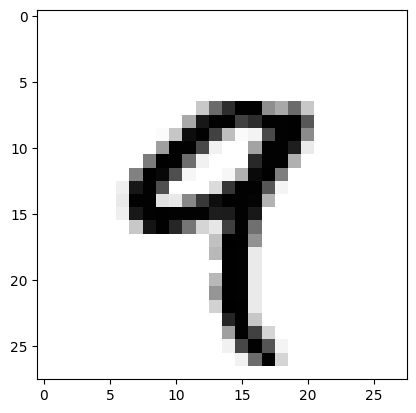

In [12]:
show_image(digit)

In [13]:
model = models.Sequential()

In [14]:
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

/Users/macbookpro/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Préparation des données images
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [18]:
# Préparation des labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
# Entraînement du modèle
history = model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8562 - loss: 0.4945 - val_accuracy: 0.9605 - val_loss: 0.1484
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9629 - loss: 0.1292 - val_accuracy: 0.9600 - val_loss: 0.1300
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9756 - loss: 0.0798 - val_accuracy: 0.9731 - val_loss: 0.0885
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9830 - loss: 0.0564 - val_accuracy: 0.9761 - val_loss: 0.0807
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9884 - loss: 0.0403 - val_accuracy: 0.9777 - val_loss: 0.0777
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9768 - val_loss: 0.0813
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9781 - val_loss: 0.0766
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9960 - loss: 0.0160 - val_accuracy: 0

In [20]:
# Evaluation du modèle
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'Accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0783
Accuracy : 0.9815999865531921


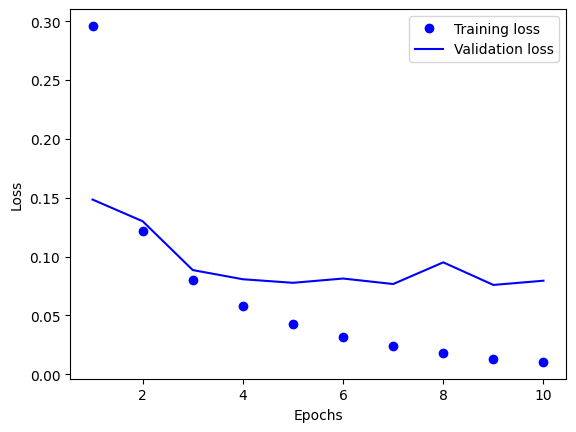

In [21]:
# Courbe d'apprentissage
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b-',label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

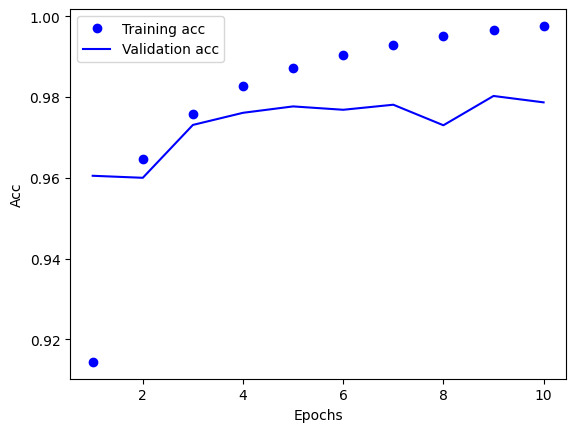

In [22]:
# Courbe d'apprentissage
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1,len(acc_values)+1)

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b-',label='Validation acc')
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()